In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.datasets import load_digits

from sklearn.preprocessing import MinMaxScaler

In [2]:
# 데이터 불러오기
data = load_digits()
input_x = data.data
input_y = data.target

scaler = MinMaxScaler()
input_x = scaler.fit_transform(input_x).astype(np.float16)

### Step1. Neighborhood Graph 생성

In [30]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=20,
                        algorithm='auto',
                        metric = 'minkowski',
                        p = 2).fit(input_x)      

### Step2. 최단 경로(Shortest Path) 계산 및 Distance Matrix 생성

In [31]:
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import connected_components
from scipy.sparse.csgraph import shortest_path
nb_graph = kneighbors_graph(
    neighbors,
    n_neighbors=20,
    metric = 'minkowski',
    p= 2,
    mode="distance"
)
n_conntected_components, labels = connected_components(nb_graph)
dist_matrix_ = shortest_path(nb_graph, method='auto', directed=False)
G = dist_matrix_**2
G *= -0.5 

### Step3. KernelPCA 및 MDS 이용 저차원 Embedding

#### Case 1) Kernel PCA 이용

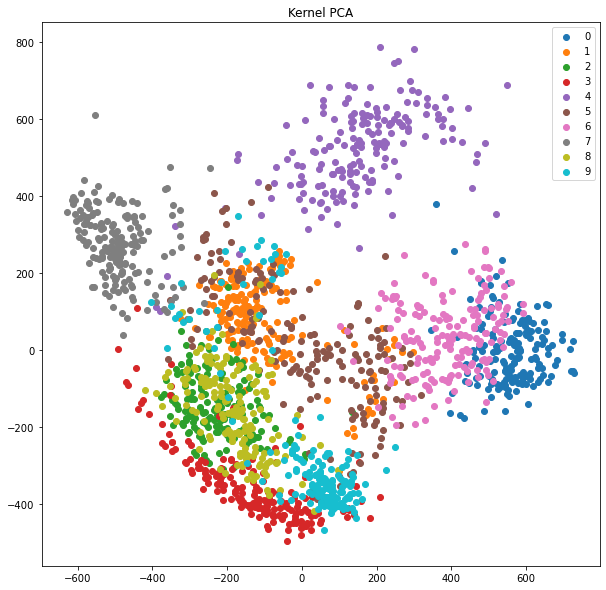

In [32]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import KernelPCA

kpca = KernelPCA()
pca_x = kpca.fit_transform(G)
plt.figure(figsize=(10,10))

for i in range(10):
    plt.scatter(pca_x[y==i][:,0],
                pca_x[y==i][:,1],
                label = i)
    plt.legend()
plt.title("Kernel PCA")
plt.show()      

#### Case 2) MDS 이용

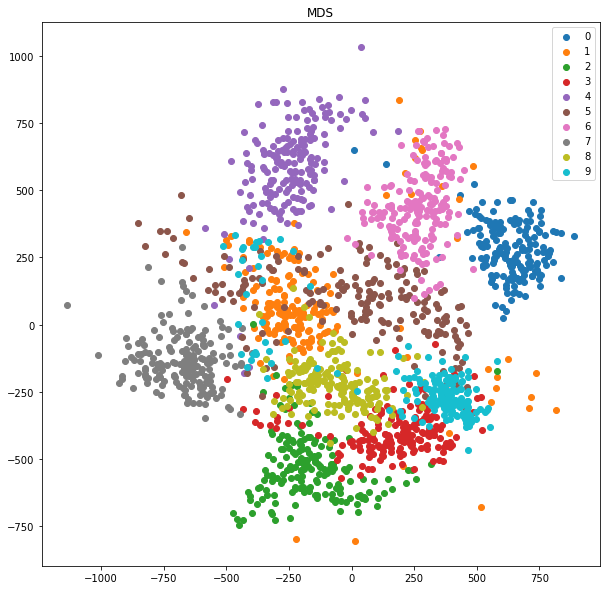

In [33]:
import matplotlib.pyplot as plt 
from sklearn.manifold import MDS 

mds = MDS()
mds_x = mds.fit_transform(G)

plt.figure(figsize=(10,10))
for i in range(10):
    plt.scatter(mds_x[input_y==i][:,0],
                mds_x[input_y==i][:,1],
                label = i)
    plt.legend()
plt.title("MDS")    
plt.show()               